In [46]:
import pandas as pd
import numpy as np
import math
import statsmodels.api as sm
import statistics as stat
import scipy.stats as stats
import pylab as py
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

### Inspect Data

In [2]:
# Load the dataset
pd.set_option('display.max_columns', None)
df = pd.read_csv('SImplyHired_cleaned_data_new_3_20.csv')
df.head()

,company_name,title,summary,star,work_style,benefit,qualification,full description,duplicate count,city,state,min salary,max salary,experience_year,education,level,programming_language,other skill,trans star,trans min salary,trans max salary,trans experience_year,trans duplicate count,work_style_split,benefit_count,other_skill_count,programming_language_count,level_encoded,Contract,Freelance,Full-time,Internship,Part-time,Permanent,Temp-to-hire,Temporary,Associate's degree,Bachelor's degree,Doctor's degree,High school diploma or GED,Master's degree,Bash,C,C#,C++,COBOL,CSS,Crystal,Fortran,Go,HTML,Java,JavaScript,Kotlin,MATLAB,ML,PHP,Perl,Python,R,Red,Rust,SQL,Scala,Shell Script,Simula,Visual Basic
0,Subcodevs,Data Scientist,"In this role, you will collaborate with cross-...",3.7,"Full-time,Contract",NaN,"IT experience within retail, Power BI, Azure, ...",Job SummaryWe are seeking a skilled Data Scien...,1,United States,United States,26540.34,36824.28,7.5,"Master's degree,Doctor's degree",Mid-level,"Python,SQL,C,Simula","IT experience within retail, Power BI, Azure, ...",0.037240,-2.221424,-1.507342,1.861461,-0.519177,"['Full-time', 'Contract']",0,25,4,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
1,Louis Vuitton,JUNIOR DATA SCIENTIST,The succesful candidate will be recognized for...,3.6,NaN,"Disability insurance, Health insurance, Dental...","Power BI, Google Cloud Platform, Mid-level, Ta...",Poste\nLouis Vuitton is seeking a dynamic and ...,1,New York,NY,100000.00,115000.00,0.0,NaN,Mid-level,"Python,Go,SQL,C","Power BI, Google Cloud Platform, Mid-level, Ta...",-0.140941,-0.583684,-0.765747,-1.112598,-0.519177,[''],7,11,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,Outlier Ai,Data Scientist - AI Trainer,About the opportunity: Outlier is looking for ...,2.4,Freelance,NaN,"Mathematics, Mid-level, Math, Bachelor's degree",Outlier helps the world’s most innovative comp...,1,Remote,Remote,38874.00,88350.00,0.0,Bachelor's degree,Mid-level,NaN,"Mathematics, Mid-level, Math, Bachelor's degree",-2.279110,-1.946452,-1.018556,-1.112598,-0.519177,['Freelance'],0,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Motus Recruiting and Staffing,Data Scientist (Remote),Assist developing reports in Workday and other...,3.0,"Full-time,Contract","Health insurance, Dental insurance, 401(k), Vi...","Power BI, Data mining, R, Mid-level, Tableau, ...","Data Scientist (Remote)Our client, a premier g...",7,Portland,OR,84816.00,84816.00,3.0,NaN,Mid-level,"Python,R,C","Power BI, Data mining, R, Mid-level, Tableau, ...",-1.210025,-0.922203,-1.052080,0.077025,3.206999,"['Full-time', 'Contract']",4,14,3,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
4,Vanderbilt University Medical Center,Data Scientist Associate,Guides and educates data science teams to prov...,3.7,Full-time,NaN,"Research, 3 years, Master's degree, Machine le...",Discover Vanderbilt University Medical Center ...,1,Nashville,TN,125300.00,182300.00,3.0,Master's degree,Senior level,"R,C","Research, 3 years, Master's degree, Machine le...",0.037240,-0.019636,-0.127322,0.077025,-0.519177,['Full-time'],0,8,2,2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### Preprocess Data and EDA

In [27]:
# create data frame with only min salary, max salary, and experience year
data = df[['min salary', 'max salary', 'experience_year']]

In [28]:
# make new column for avg salary
data['Average_Salary'] = (data['min salary'] + data['max salary']) / 2


<ipython-input-28-f14b037bd918>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Average_Salary'] = (data['min salary'] + data['max salary']) / 2


In [29]:
data.head()

,min salary,max salary,experience_year,Average_Salary
0,26540.34,36824.28,7.5,31682.31
1,100000.00,115000.00,0.0,107500.00
2,38874.00,88350.00,0.0,63612.00
3,84816.00,84816.00,3.0,84816.00
4,125300.00,182300.00,3.0,153800.00


<ipython-input-30-5ba57e914581>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Average_Salary'])


<Axes: xlabel='Average_Salary', ylabel='Density'>

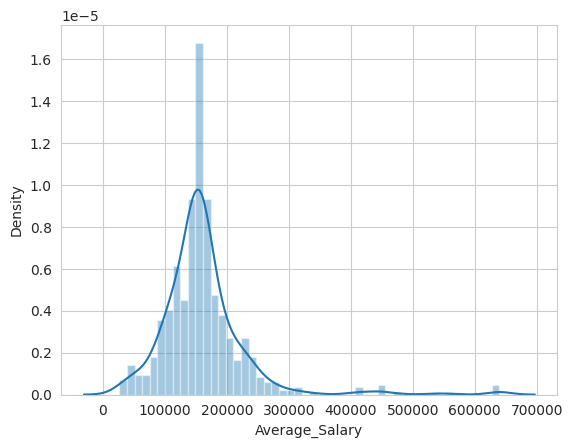

In [30]:
# look at average salary plot
sns.set_style('whitegrid')
sns.distplot(data['Average_Salary'])

<ipython-input-31-3b10e9215199>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['experience_year'])


<Axes: xlabel='experience_year', ylabel='Density'>

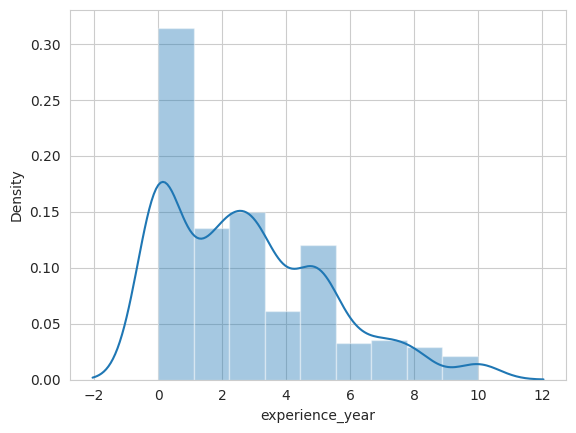

In [31]:
# look at experience year plot
sns.set_style('whitegrid')
sns.distplot(data['experience_year'])

In [32]:
# delete row with experience year is 0
data = data[df.experience_year != 0]
# look at it
sns.set_style('whitegrid')
sns.distplot(data['experience_year'])

<ipython-input-33-a2951edbbd00>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['experience_year'])


<Axes: xlabel='experience_year', ylabel='Density'>

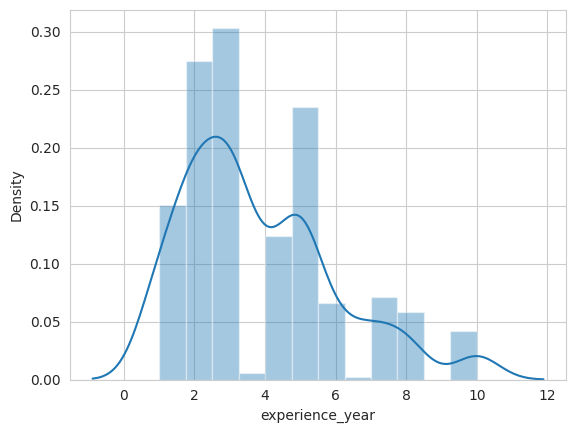

In [33]:
# look at it
sns.set_style('whitegrid')
sns.distplot(data['experience_year'])

In [34]:
# log transform experience years
data['experience_year_log'] = np.log(data['experience_year'])
# look at it
sns.set_style('whitegrid')
sns.distplot(data['experience_year_log'])

<ipython-input-35-ddde68135d66>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['experience_year_log'])


<Axes: xlabel='experience_year_log', ylabel='Density'>

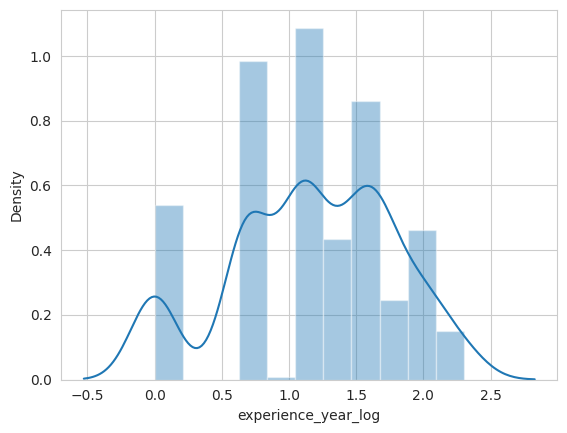

In [35]:
# look at it
sns.set_style('whitegrid')
sns.distplot(data['experience_year_log'])

<ipython-input-36-b4346f865e68>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Average_Salary'])


<Axes: xlabel='Average_Salary', ylabel='Density'>

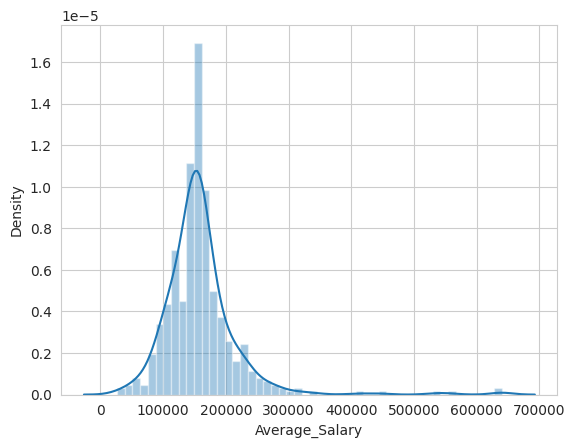

In [36]:
# look at average salary plot again
sns.set_style('whitegrid')
sns.distplot(data['Average_Salary'])

In [38]:
# remove outliers
z_scores = np.abs(stats.zscore(data['Average_Salary']))
data = data[(z_scores < 3)]

<ipython-input-39-ff1db56d5b40>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Average_Salary'])


<Axes: xlabel='Average_Salary', ylabel='Density'>

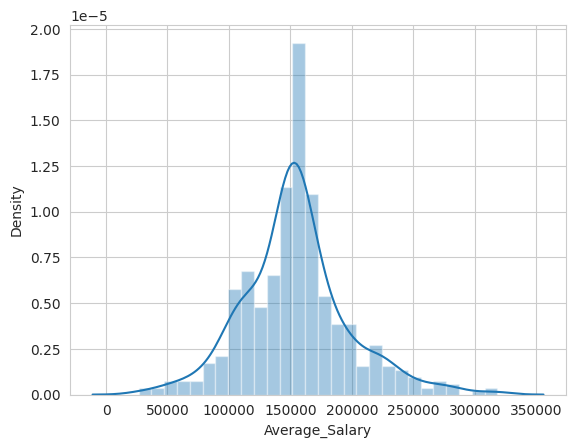

In [39]:
# look at average salary plot again again
sns.set_style('whitegrid')
sns.distplot(data['Average_Salary'])

In [41]:
#
data = data[~((data['Average_Salary'] == 153800.00) & (data.duplicated(subset=['Average_Salary'], keep='first')))]

<ipython-input-42-981523af3cb5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Average_Salary'])


<Axes: xlabel='Average_Salary', ylabel='Density'>

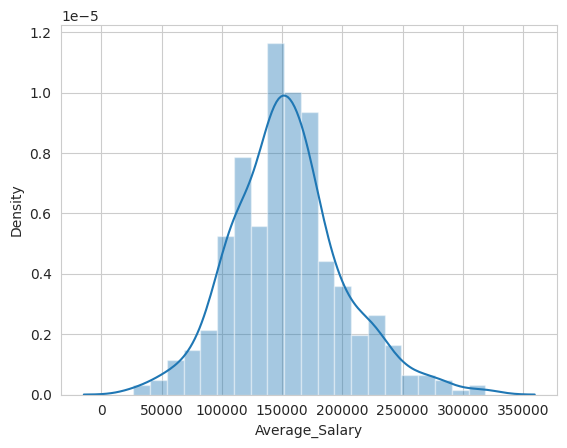

In [42]:
# look at average salary plot again again and again
sns.set_style('whitegrid')
sns.distplot(data['Average_Salary'])

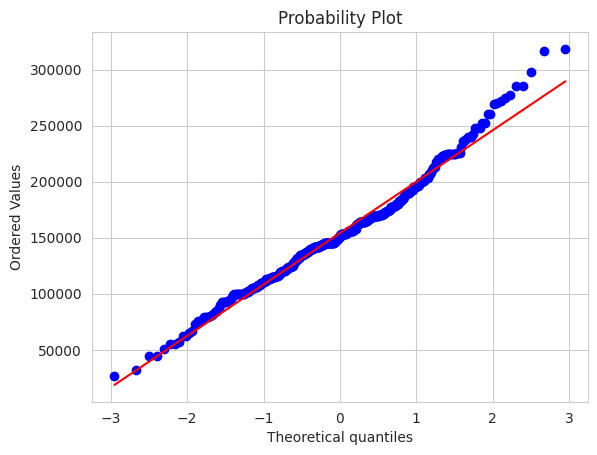

In [43]:
# create qq plot
plt.figure
stats.probplot(data['Average_Salary'], dist="norm", plot=plt)
plt.show()

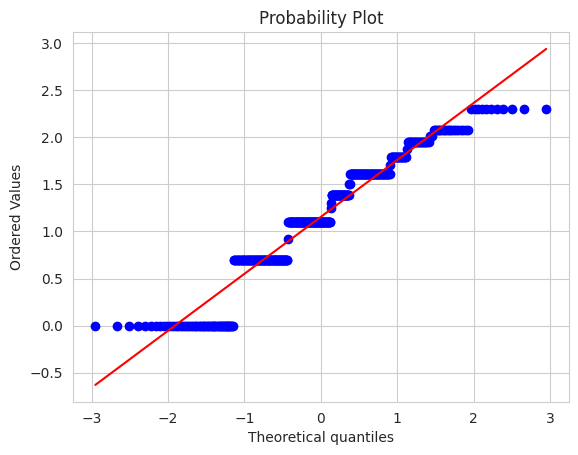

In [44]:
# create qq plot
plt.figure
stats.probplot(data['experience_year_log'], dist="norm", plot=plt)
plt.show()

### Implement Model

In [61]:
# Linear regression

# set x and y
X = data[['experience_year']]
y = data['Average_Salary']

# standardize X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)
r2_score = model.score(X_test, y_test)

In [65]:
# Define the feature and target
X = data[['experience_year_log']]  # independent variable
y = data['Average_Salary']         # dependent variable

# Add constant term for intercept
X_const = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X_const).fit()

# Print the full summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Average_Salary   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     14.74
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           0.000142
Time:                        12:19:51   Log-Likelihood:                -5317.2
No. Observations:                 438   AIC:                         1.064e+04
Df Residuals:                     436   BIC:                         1.065e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.386e+05   4

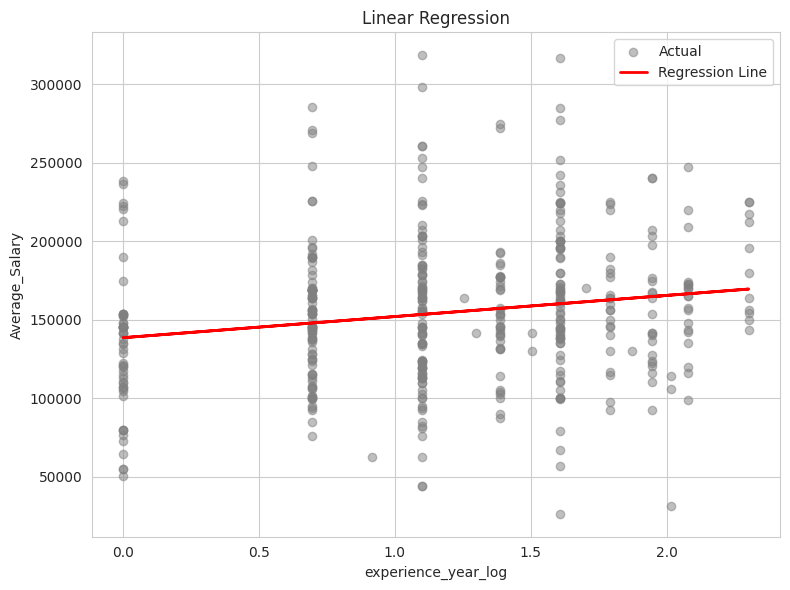

In [67]:
y_pred = model.predict(X_const)

# Plot actual vs regression line
plt.figure(figsize=(8, 6))
plt.scatter(X['experience_year_log'], y, alpha=0.5, color='gray', label='Actual')
plt.plot(X['experience_year_log'], y_pred, color='red', label='Regression Line', linewidth=2)
plt.title('Linear Regression')
plt.xlabel('experience_year_log')
plt.ylabel('Average_Salary')
plt.legend()
plt.tight_layout()
plt.show()

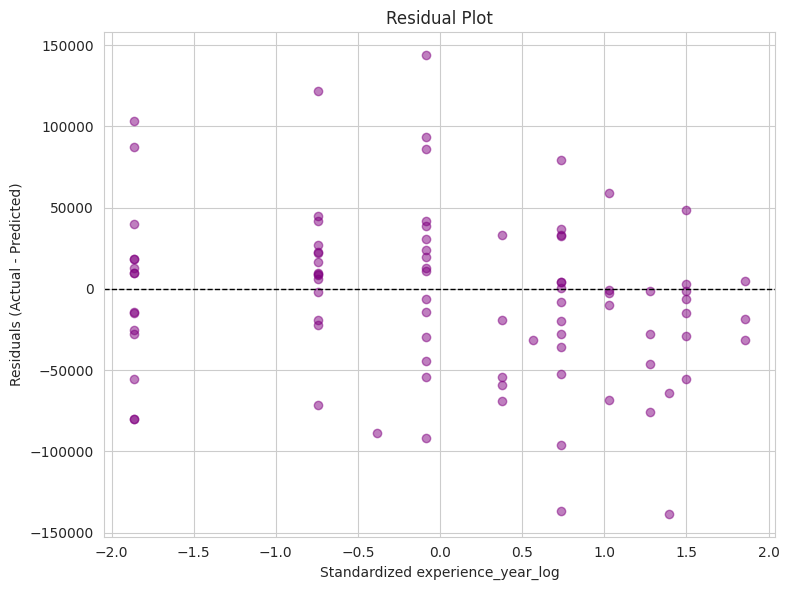

In [51]:
# residual plot
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(X_test, residuals, color='purple', alpha=0.5)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('Residual Plot')
plt.xlabel('Standardized experience_year_log')
plt.ylabel('Residuals (Actual - Predicted)')
plt.tight_layout()
plt.show()